In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import fastbook
from fastbook import *
import os
from pathlib import *
from fastai.vision.widgets import *

/Users/fahadaloufi/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# load the model
path = Path()
learn_inf = load_learner(path/'export.pkl')

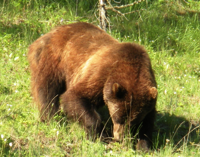

('grizzly', tensor(1), tensor([0.0217, 0.9765, 0.0018]))

In [5]:
# get an image of a grizzly bear to predict
grizzly_image_path = (path/'bears/grizzly').ls()[0]
# show the image
grizzly_image = Image.open(grizzly_image_path)
display(grizzly_image.to_thumb(200, 200))
learn_inf.predict(grizzly_image_path)

The output returned is:
- predicted category
- index of category in the vocab
- the probabilities for each category

Let's check the order of the categories in the vocab

In [6]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

## Creating an App from the Model

In [7]:
# using ipython widgets and Violà
btn_upload = widgets.FileUpload()

In [8]:
btn_upload


FileUpload(value=(), description='Upload')

In [12]:
img = PILImage.create(btn_upload.value[-1].content.tobytes())

In [13]:
out_p1 = widgets.Output()
out_p1.clear_output()
with out_p1: display(img.to_thumb(128, 128))
out_p1

Output()

In [14]:
pred, pred_idx, probs = learn_inf.predict(img)

In [15]:
#labels 
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred.title()}.  Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Black.  Probability: 0.9998')

In [20]:
# button for classification
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [24]:
# click event handler
def on_click_classify(change):
    img = PILImage.create(btn_upload.value[0].content.tobytes())
    out_p1.clear_output()
    with out_p1: display(img.to_thumb(128,128))
    pred, pred_idx, probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred.title()}. Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [25]:
# put all the widgest together
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Select your bear!'), btn_upload, btn_run, out_p1, lbl_pred])